<a href="https://colab.research.google.com/github/J-a-y-a-shree/BtpFinalAttempt/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [5]:
data = pd.read_csv("/content/creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
print(data.describe())

                Time             V1             V2             V3  \
count  190239.000000  190239.000000  190239.000000  190238.000000   
mean    67549.991973      -0.122651       0.010621       0.371211   
std     32625.905925       1.884429       1.621432       1.432007   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     43257.000000      -0.968132      -0.571992      -0.252441   
50%     65180.000000      -0.114371       0.086750       0.532221   
75%     84873.000000       1.203983       0.786654       1.247291   
max    128750.000000       2.439207      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  190238.000000  190238.000000  190238.000000  190238.000000   
mean        0.086960      -0.131764       0.050747      -0.059859   
std         1.392225       1.356895       1.306926       1.213701   
min        -5.683171     -42.147898     -26.160506     -43.557242   
25%        -0.779671      -0.7981

In [7]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.001953999378512327
Fraud Cases: 371
Valid Transactions: 189867


In [8]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,371.000000
mean,115.161968
std,247.521805
min,0.000000
25%,1.000000
50%,11.400000
75%,102.750000
max,2125.870000


In [9]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,189867.000000
mean,89.230652
std,248.469236
min,0.000000
25%,5.990000
50%,22.810000
75%,79.000000
max,19656.530000


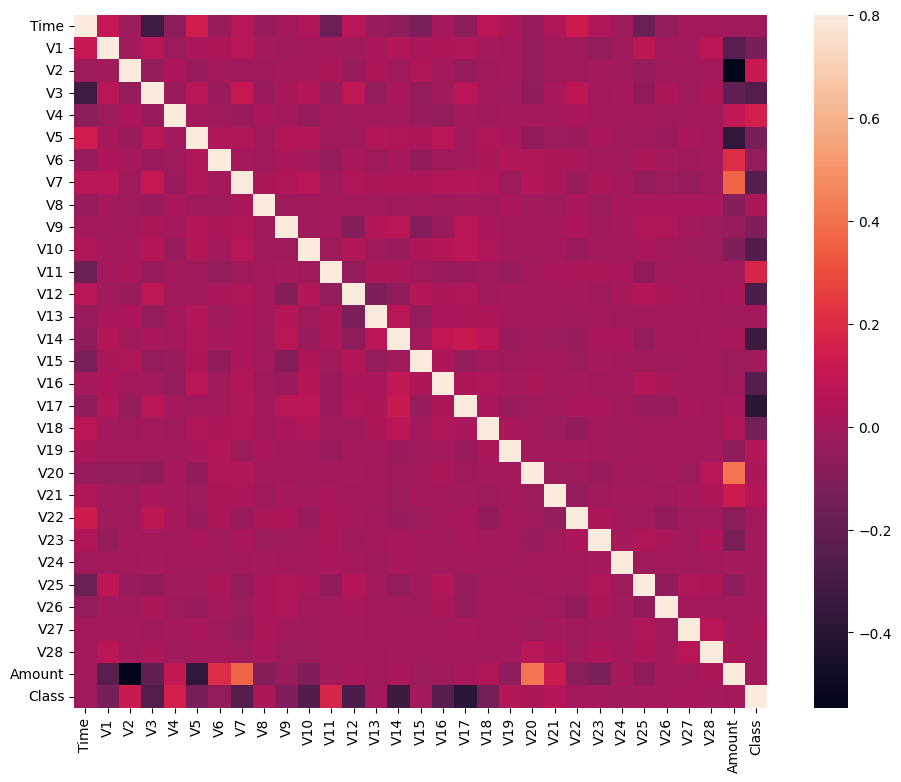

In [10]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis=1)
Y = data['Class']
print(X.shape)
print(Y.shape)

# getting just the values for the sake of processing
xData = X.values
yData = Y.values

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
    xData, yData, test_size=0.2, random_state=42
)

# Option A: save as CSV (with column names)
xTrain_df = pd.DataFrame(xTrain, columns=X.columns)
xTest_df  = pd.DataFrame(xTest,  columns=X.columns)
yTrain_df = pd.DataFrame(yTrain, columns=['Class'])
yTest_df  = pd.DataFrame(yTest,  columns=['Class'])

xTrain_df.to_csv('x_train.csv', index=False)
xTest_df.to_csv( 'x_test.csv',  index=False)
yTrain_df.to_csv('y_train.csv', index=False)
yTest_df.to_csv( 'y_test.csv',  index=False)

# Option B: save as NumPy binary files
np.save('x_train.npy', xTrain)
np.save('x_test.npy',  xTest)
np.save('y_train.npy', yTrain)
np.save('y_test.npy',  yTest)


(190239, 30)
(190239,)


In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [13]:
from sklearn.impute import SimpleImputer
print("NaN values in yTest before imputation:", np.isnan(yTest).sum())

imputer = SimpleImputer(strategy='most_frequent')
yTest = imputer.fit_transform(yTest.reshape(-1, 1)).flatten()
print("NaN values in yTest after imputation:", np.isnan(yTest).sum())

NaN values in yTest before imputation: 1
NaN values in yTest after imputation: 0


Model Evaluation Metrics:
Accuracy: 0.9996
Precision: 0.9403
Recall: 0.8514
F1-Score: 0.8936
Matthews Correlation Coefficient: 0.8945


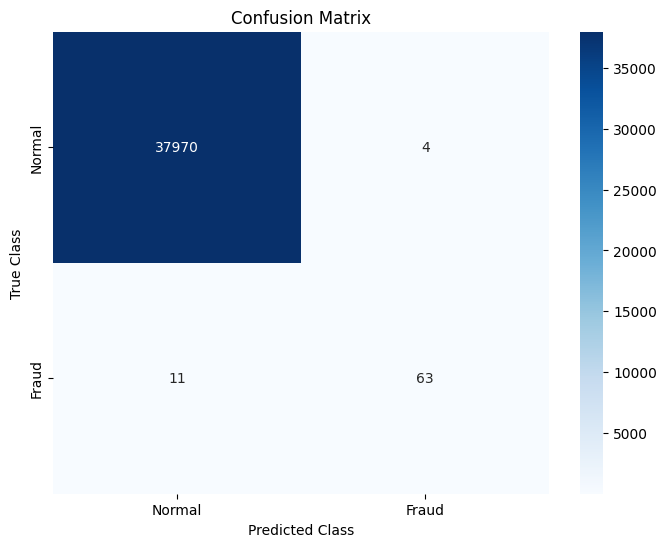

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix # Evaluation metrics
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()